In [2]:
import pandas as pd
pd.set_option('display.html.table_schema', True)

Leitura de Dados

In [4]:
df = pd.read_excel("input\DadosGeralClean.xls")

Excluir Colunas


In [5]:
df1 = df.drop(["Minimo_dif", "Maximo_dif", "Media_dif", "Mediana_dif", "SDNN", "SDSD", "RMSSD", "PNN50"], axis = 1)

Descrição DataSet


In [6]:
#print(df1.count())
print("Descrição")
print(df1.describe())
print(df1.shape)

Descrição
                ID       Stress        Média      Mediana       Minimo  \
count  6403.000000  6403.000000  6403.000000  6403.000000  6403.000000   
mean     43.350929     0.097923     0.810047     0.809648     0.510760   
std      24.138342     0.297234     0.108536     0.117163     0.127530   
min       1.000000     0.000000     0.446820     0.414800     0.348432   
25%      27.000000     0.000000     0.745276     0.746640     0.431392   
50%      39.000000     0.000000     0.793346     0.796416     0.464576   
75%      64.000000     0.000000     0.852465     0.862784     0.547536   
max     104.000000     1.000000     1.391108     1.410320     1.310768   

            Maximo  
count  6403.000000  
mean      1.218681  
std       0.173654  
min       0.497760  
25%       1.111664  
50%       1.227808  
75%       1.310768  
max       1.708976  
(6403, 6)


Agrupamento + Média


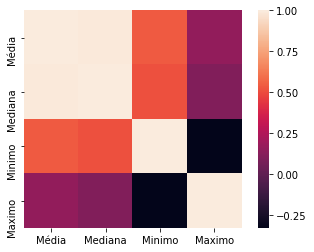

In [7]:
print(df1.groupby(['ID', 'Stress']).mean().head())

Exportar para Excel


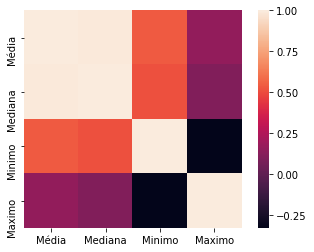

In [8]:
# https://xlsxwriter.readthedocs.io/example_pandas_simple.html
writer = pd.ExcelWriter('output\output01.xlsx', engine='xlsxwriter')
df1.groupby(['ID', 'Stress']).mean().to_excel(writer, sheet_name='Sheet1')
writer.save()

writer = pd.ExcelWriter('output\output03.xlsx', engine='xlsxwriter')
df1.sort_values(['Minimo', 'Maximo'], ascending=True).groupby(['ID', 'Stress']).mean().to_excel(writer, sheet_name='Sheet1')
writer.save()

HeatMap


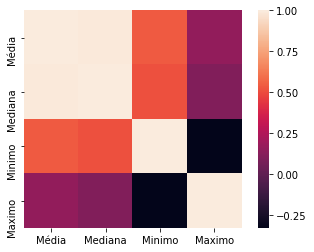

In [12]:
cor = df1.groupby(['ID', 'Stress']).mean().corr() #Correlation
import seaborn as sns
sns.heatmap(cor, square = True)

Gráficos

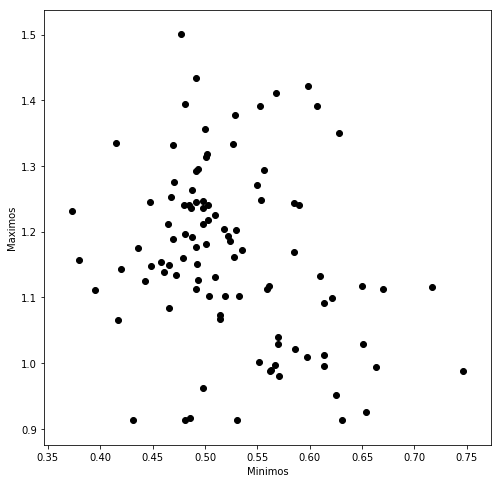

In [13]:
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.DataFrame({
    'x': df1.groupby(['ID']).mean()['Minimo'],
    'y': df1.groupby(['ID']).mean()['Maximo']
})
fig = plt.figure(figsize=(8, 8))
plt.xlabel('Minimos')
plt.ylabel('Maximos')
plt.scatter(df3['x'], df3['y'], color='k')
plt.show()

In [14]:
df4 = pd.DataFrame({
    'x': df1['Minimo'],
    'y': df1['Maximo']
})
fig = plt.figure(figsize=(8, 8))
plt.xlabel('Minimos')
plt.ylabel('Maximos')
plt.scatter(df4['x'], df4['y'], color='k')
plt.show()

KMeans

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)
km.fit(df1.groupby(['ID', 'Stress']).mean())
x = km.fit_predict(df1.groupby(['ID', 'Stress']).mean())
df1.groupby(['ID', 'Stress']).mean()["Cluster"] = x
#print(df1.groupby(['IDIndividual', 'Stress']).mean())

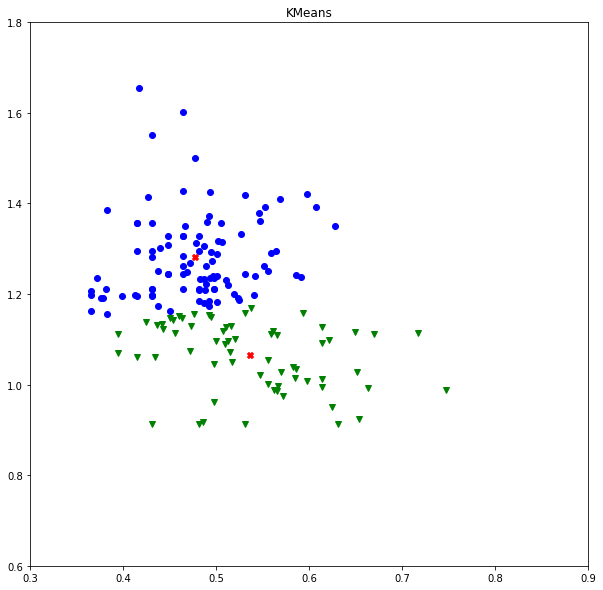

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array(df1.groupby(['ID', 'Stress']).mean()['Minimo'])
x2 = np.array(df1.groupby(['ID', 'Stress']).mean()['Maximo'])

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans 
K = 2
km = KMeans(n_clusters=K, init='k-means++', n_init=10)
km.fit(df1.groupby(['ID', 'Stress']).mean())
kModel = KMeans(n_clusters=K).fit(X)

#print(kModel.cluster_centers_)
centers = np.array(kModel.cluster_centers_)

fig = plt.figure(figsize=(10, 10))
plt.plot()
plt.title('KMeans')

for i, l in enumerate(kModel.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0.3, 0.9])
    plt.ylim([0.6, 1.8])

plt.scatter(centers[:, 0], centers[:, 1], marker="X", color='r')
